# Perceptron algorithm

In [1]:
def weighted_sum(xs, ws):   
    return sum([xs[i]*ws[i] for i in range(len(xs))])
    

def perceptron(xs, ds, weights, threshold=0.5, a=0.1, verbose=False):
    """
    Single perceptron algorithm
    
    xs: list/tuple
        List or tuple of shape (x11, x12,...,x1n), (x21, x22,...,x2n), ...
        (xm1, xm2,...,xmn) where the xn are features.
         
    ds: list/tuple
        List or tuple of shape (d1, d2,...,dm) where the dm are the labels
        for the features (xm1, xm2,...,xmn). 
    
    weights: list/tuple
        List or tuple of shape (w1, w2,...,wn) where the wn are the initial
        weights for each of the n features.
        
    threshold: float, default 0.5
        Threshold for the stepwise function which is used as activation fu-
        nction. 
    
    a: float
        Learning ratio.
    
    Returns a tuple containing the weights for the perceptron. 
    """
    
    #Storage the weights
    Ws = [weights]
    
    #Number of features
    nf = len(weights)
    
    while True:
        #Counting the errors for each iteration, if equals 0, then
        #the algorithm spots
        err_count = 0
        
        for row, d in zip(xs, ds):
            #Weighted sum of the features in each row
            ws = []
            z = weighted_sum(row, Ws[-1])
            
            #Appliying stepwise activation function
            if z<threshold: y = 0 
            else: y = 1
            
            #updating weights  by using w_new = w_old + a(d-y)x_j and
            #counting the number of errors (bad classifications) with
            #the new weights
            for j in range(nf):
                ws.append(Ws[-1][j] + a*(d - y)*row[j])
                err_count += abs(d-y)

            Ws.append(ws)
            
            if verbose: print(ws)
        if verbose: print("-"*len(f"{ws}"))
            
        if err_count==0: return Ws
        
        
def proof_perceptron(xs, ds, weights, threshold=0.5):
    """
    Prints a table with the features, labels and results obtained for the
    perceptron when using "weights".
    
    xs: list/tuple
        List or tuple of shape (x11, x12,...,x1n), (x21, x22,...,x2n), ...
        (xm1, xm2,...,xmn) where the xn are the n features.
         
    ds: list/tuple
        List or tuple of shape (d1, d2,...,dm) where the dm are the labels
        for the features (xm1, xm2,...,xmn). 
    
    weights: list/tuple
        List or tuple of shape (w1, w2,...,wn) where the wn are the initial
        weights for each of the n features.
        
    threshold: float, default 0.5
        Threshold for the stepwise function which is used as activation fu-
        nction. 
    """
    
    title = ""
    for i in range(len(xs[0])):
        title += f"x_{i+1}\t"
        
    title += "d\ty"
    print(title)
    
    for row, d in zip(xs, ds):
        z = weighted_sum(row, weights)
            
        #Appliying stepwise activation function
        if z<threshold: y = 0 
        else:y = 1
            
        line = ""
        for i in range(len(weights)):
            line+=f" {row[i]}\t"
        line+=f"{d}\t{y}"
            
        print(line)

# Proofs

The & function

In [2]:
xs_and  = (1,1), (1,0), (0,1), (0,0)
ds_and  = 1,0,0,0
ws_and0 = 0,0

In [3]:
ws_and = perceptron(xs=xs_and, ds=ds_and, weights=ws_and0)[-1]
ws_and

[0.30000000000000004, 0.30000000000000004]

In [4]:
proof_perceptron(xs=xs_and, ds=ds_and, weights=ws_and)

x_1	x_2	d	y
 1	 1	1	1
 1	 0	0	0
 0	 1	0	0
 0	 0	0	0


NAND function

In [5]:
xs_NAND  = (1,0,0), (1,0,1), (1,1,0), (1,1,1)
ds_NAND  = 1,1,1,0
ws_NAND0 = 0,0,0

In [6]:
ws_NAND = perceptron(xs=xs_NAND, ds=ds_NAND, weights=ws_NAND0)[-1]
ws_NAND

[0.7999999999999999, -0.2, -0.1]

In [7]:
proof_perceptron(xs=xs_NAND, ds=ds_NAND, weights=ws_NAND)

x_1	x_2	x_3	d	y
 1	 0	 0	1	1
 1	 0	 1	1	1
 1	 1	 0	1	1
 1	 1	 1	0	0


Classification problem

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib notebook

In [9]:
#Centers for the bubbles
center_1 = (0, 0)
center_2 = (2,1.5)
N = 1000

#Labels
labels_1 = (0,)*N
labels_2 = (1,)*N

#seed
np.random.seed(1235947)

#First bubble
x1y1 = np.random.normal(loc=center_1, scale=0.4, size=(N,len(center_1)))

#Second bubble
x2y2 = np.random.normal(loc=center_2, scale=0.35, size=(N,len(center_2)))


<IPython.core.display.Javascript object>


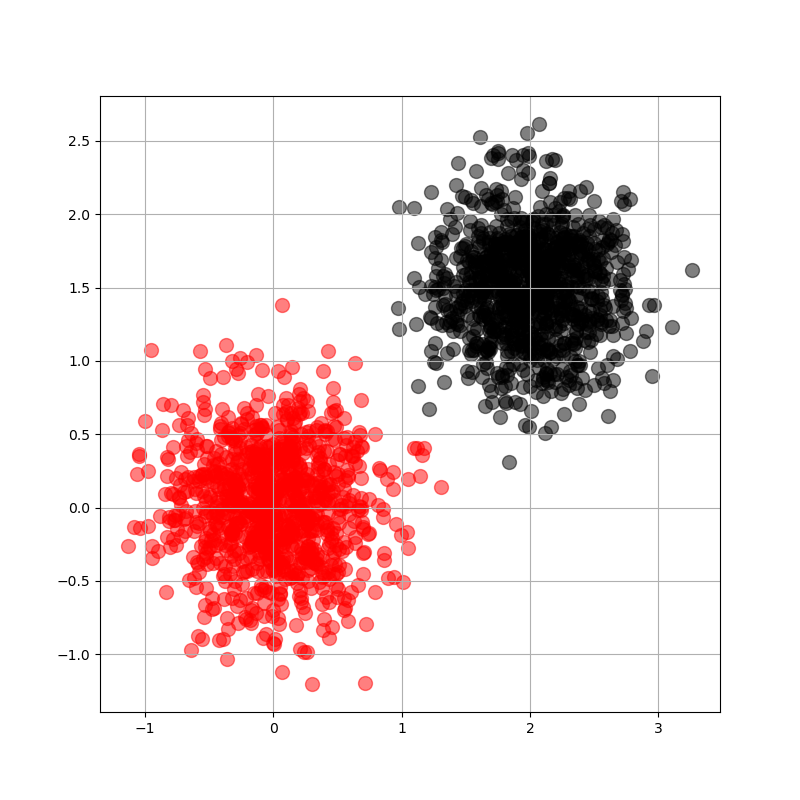

In [10]:
fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(x=x1y1[:,0], y=x1y1[:,1], c="red",   s=100, alpha=0.5)
ax.scatter(x=x2y2[:,0], y=x2y2[:,1], c="black", s=100, alpha=0.5)
ax.grid()
plt.show()

In [11]:
ws_bubbles0 = 0, 0
ws_bubbles = perceptron(xs=np.concatenate((x1y1, x2y2)),
                        ds=np.concatenate((labels_1, labels_2)),
                        weights=ws_bubbles0)
ws_bubbles[-1]

[0.2432549835378577, 0.32342691269332735]

In [12]:
"""proof_perceptron(xs=np.concatenate((x1y1, x2y2)),
                 ds=np.concatenate((labels_1, labels_2)),
                 weights=ws_bubbles[-1])"""

'proof_perceptron(xs=np.concatenate((x1y1, x2y2)),\n                 ds=np.concatenate((labels_1, labels_2)),\n                 weights=ws_bubbles[-1])'

<IPython.core.display.Javascript object>


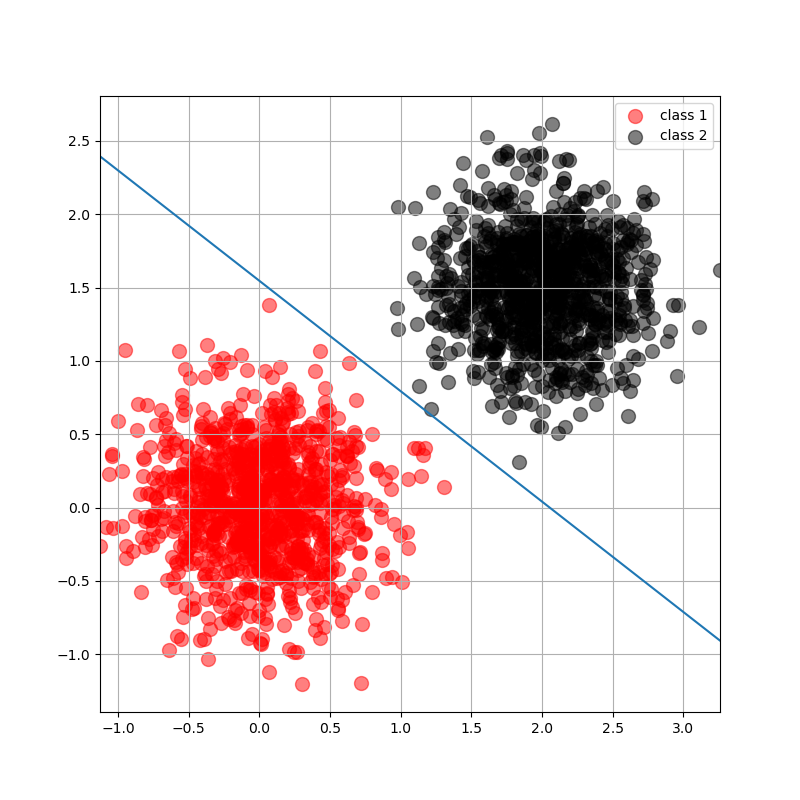

In [13]:
fig, ax = plt.subplots(figsize=(8,8))

xs = np.linspace(min(np.concatenate((x1y1[:,0],x2y2[:,0]))), max(np.concatenate((x1y1[:,0],x2y2[:,0]))))
ys = (0.5 - xs*ws_bubbles[-1][0])/ws_bubbles[-1][1]

ax.scatter(x=x1y1[:,0], y=x1y1[:,1], c="red",   s=100, alpha=0.5, label="class 1")
ax.scatter(x=x2y2[:,0], y=x2y2[:,1], c="black", s=100, alpha=0.5, label="class 2")

ax.set_xlim(min(xs), max(xs))
ax.legend()
plt.plot(xs, ys)
plt.grid()

plt.show()

<IPython.core.display.Javascript object>


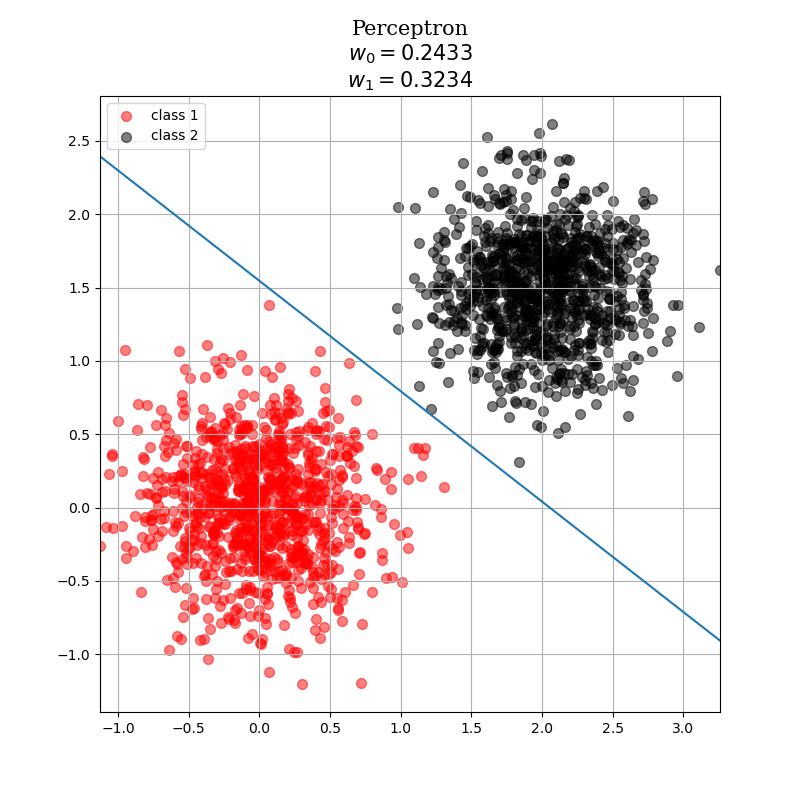

In [15]:
#Amount of points to plot each iteration
step = N
idx  = step

#To run the animation until all the points have been plotted
#it's needed to choose the frames properly
frames = int(len(ws_bubbles)/step) 

font_title = {
        'family': 'serif',
        'color' : 'Black',
        'weight': 'normal',
        'size': 15}

fig, ax = plt.subplots(figsize=(8,8))

def init_function():
    pass
    
#Function to animate. Each iteration it increases the amount of
#points by adding 'step' points to the count variable 'idx'.

def draw(i):

    global idx
    ax.cla()
    ax.scatter(x=x1y1[:,0], y=x1y1[:,1], c="red",   s=50, alpha=0.5, label="class 1")
    ax.scatter(x=x2y2[:,0], y=x2y2[:,1], c="black", s=50, alpha=0.5, label="class 2")
    
    ys = (0.5 - xs*ws_bubbles[idx-1][0])/ws_bubbles[idx-1][1]
    ax.plot(xs, ys)
    
    ax.set_xlim(min(xs), max(xs))
    ax.legend(loc="upper left")
    plt.grid()
    ax.set_title(f"Perceptron\n$w_0={ws_bubbles[idx][0]:.4f}$\n$w_1={ws_bubbles[idx][1]:.4f}$", fontdict=font_title)
    idx += step
    plt.show()
    
animation = FuncAnimation(plt.gcf(), draw, frames, interval=100, repeat=False, init_func=init_function) 
#animation.save('./perceptron.gif', writer='ffmpeg', fps=10, bitrate=1000)